In [1]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from scipy import stats

### Define os parâmetros de entrada para o Grupo 12

In [2]:
rep_cycle_hengelson = [7,2,7,7,7,2,2,5,6,5,6,5,6,1,6,4,3,4,3,4]
rep_cycle_tgs = [7,6,4,5,2,3,7,6,1,4,5,2,7,6,3,4,5,2,7,6]
rep_cycle_own = [7,6,4,5,7,2,6,5,4,7,2,6,3,4,1,5,7,2,6,3]

rep_cycle_full = 2*rep_cycle_hengelson

# Define o tempo de processamento de cada um dos produtos reais em cada estação
data = {0:[718, 723.5, 662.6, 701.7, 714.2, 748.3, 655.1],
        1:[591, 546.7, 540, 603.6, 522.7, 609.1, 580.3], 
        2:[741, 745.5, 699.7, 766.5, 753.3, 590.1, 714.8], 
        3:[769, 702.1, 644.6, 783.7, 756.3, 682.4, 730.2], 
        4:[748, 746.1, 709.5, 789.6, 648.1, 692.5, 730.9]}

dados = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

In [3]:
dados

,0,1,2,3,4
1,718.0,591.0,741.0,769.0,748.0
2,723.5,546.7,745.5,702.1,746.1
3,662.6,540.0,699.7,644.6,709.5
4,701.7,603.6,766.5,783.7,789.6
5,714.2,522.7,753.3,756.3,648.1
6,748.3,609.1,590.1,682.4,692.5
7,655.1,580.3,714.8,730.2,730.9


In [4]:
dados.loc[6,3]

682.4

In [5]:
arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
df = pd.DataFrame(index=range(5), columns=index)

### Define a função que cálcula o Gannt para determinada sequência de produtos a serem produzidos

In [6]:
def gen_gannt(seq):
    
    rep_cycle_full = seq*2 # Calcula o Gannt para 2 repetições da sequência
    stations_list = range(5) # Define o número de estações
    
    # Cria o DataFrame com as linhas representando as estações e a colunas os produtos
    arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
    index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
    df = pd.DataFrame(index=range(5), columns=index)
    
    for station in stations_list:
        if station == 0:
            # Na primeira estação não é necessário verificar a existência de desbalanceamentos com a linha anterior 
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = 0 # Primeira estação inicia o trabalho no momento 0
                    df.loc[station, (i, 'Fim')] = dados.loc[j, station] # Tempo de início de fabricação produto + tempo de processamento
                else:
                    df.loc[0, (i, 'Inicio')] = df.loc[0, (i-1, 'Fim')] # Tempo de início do produto n será o mesmo que o tempo de fim do produto n-1
                    df.loc[0, (i, 'Fim')] = df.loc[0, (i, 'Inicio')] + dados.loc[j, station] # Adiciona o tempo de processamento ao tempo de início do produto
        else:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = df.loc[station-1, (i, 'Fim')]
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]
                else:
                    # Só permite que o produto seja produziso na estação k se este já tiver sido produzido an estação k-1
                    df.loc[station, (i, 'Inicio')] = max([df.loc[station-1, (i, 'Fim')],df.loc[station, (i-1, 'Fim')]])
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]

    return df

### Gera 1000 sequências aleatórias considerando as demandas de cada produto
Créditos: Grupo10

In [7]:
tarefasOrder = []
possibleNumbers = []

for i in range (0,1000):  
    partial_list = []
    l1 = 1
    l2 = 3
    l3 = 2
    l4 = 3
    l5 = 3
    l6 = 4
    l7 = 4
    nextNumber = ''
    for j in range (0,20):
        possibleNumbers = []
        if l1>=1:
            possibleNumbers.append(1)
        if l2>=1:
            possibleNumbers.append(2)
        if l3>=1:
            possibleNumbers.append(3)
        if l4>=1:
            possibleNumbers.append(4)
        if l5>=1:
            possibleNumbers.append(5)
        if l6>=1:
            possibleNumbers.append(6)
        if l7>=1:
            possibleNumbers.append(7)

        nextNumber = random.choice(possibleNumbers)

        if(nextNumber==1):
            l1=l1-1
        if(nextNumber==2):
            l2=l2-1
        if(nextNumber==3):
            l3=l3-1
        if(nextNumber==4):
            l4=l4-1
        if(nextNumber==5):
            l5=l5-1
        if(nextNumber==6):
            l6=l6-1
        if(nextNumber==7):
            l7=l7-1
        partial_list.append(nextNumber)
    tarefasOrder.append(partial_list)

#     print(tarefasOrder)
#     tarefasOrder.clear()

In [8]:
dic = {}
for i,j in enumerate(tarefasOrder):
    if i%100==0:    
        print(i)
    dic[i] = (gen_gannt(j),j)

0
100
200
300
400
500
600
700
800
900


### Gannt gerado para uma das sequências aleatórias

In [9]:
dic[750][0]

Pos        0               1               2               3               4   \
state  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0           0   655.1   655.1  1378.6  1378.6  2080.3  2080.3  2794.5  2794.5   
1       655.1  1235.4  1378.6  1925.3  2080.3  2683.9  2794.5  3317.2  3496.2   
2      1235.4  1950.2  1950.2  2695.7  2695.7  3462.2  3462.2  4215.5  4215.5   
3      1950.2  2680.4  2695.7  3397.8  3462.2  4245.9  4245.9  5002.2  5002.2   
4      2680.4  3411.3  3411.3  4157.4  4245.9  5035.5  5035.5  5683.6  5785.9   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3496.2  ...  24479.9  25181.6  25181.6  25905.1  25905.1  26653.4   
1      4099.8  ...  25181.6  25785.2  25905.1  26451.8  26653.4  27262.5   
2        4982  ...  26264.9  27031.4  27031.4  27776.9  27776.9    28367   
3      5785.9  ...  27366.7  28150.4  28150.4  28852.5  28852.5  29534.9   
4      6575.5  ...    28300  29089.6  29089.6  29835.7  29835.7  30528.2   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26653.4  27401.7  27401.7    28150  
1      27401.7  28010.8    28150  28759.1  
2        28367  28957.1  28957.1  29547.2  
3      29534.9  30217.3  30217.3  30899.7  
4      30528.2  31220.7  31220.7  31913.2  

[5 rows x 80 columns]

### Define a função para uma métrica e calcula-a para os itens a), b), d) e para as 1000 sequências aleatórias

Métrica: $\lambda = \frac{tempo\;total\;ideal}{tempo\;total\;real}= \frac{40c}{tempo\;total\;real}$

sendo:
    
    1. Tempo total real - Valor do fim no Gannt para o último produto produzido
    2. Tempo total ideal - Tempo necessário para produzir 40 unidades caso o tempo de ciclo da linha fosse seguido

In [10]:
def calc_metric(gannt):
    ideal_full_cycle = 722*40
    return ideal_full_cycle/gannt.loc[4, (39, 'Fim')]

hengelson_metric = calc_metric(gen_gannt(rep_cycle_hengelson))
tgs_metric = calc_metric(gen_gannt(rep_cycle_tgs))
own_metric = calc_metric(gen_gannt(rep_cycle_own))
work_metrics = [hengelson_metric, own_metric, tgs_metric]

metrics = []
for i in dic.keys():
    metrics.append(calc_metric(dic[i][0]))

full_metrics = metrics + work_metrics

full_sorted_metrics = sorted(full_metrics)

In [11]:
hengelson_index = full_sorted_metrics.index(hengelson_metric)
tgs_index = full_sorted_metrics.index(tgs_metric)
own_index = full_sorted_metrics.index(own_metric)

Text(0.5, 1.0, 'Métrica para os 1000 sequenciamentos aleatórios')

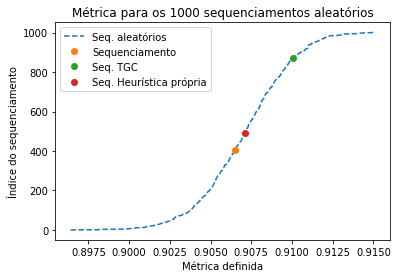

In [12]:
fig1, ax1 = plt.subplots()
ax1.plot(full_sorted_metrics,range(len(full_sorted_metrics)), '--', label='Seq. aleatórios')
ax1.plot(hengelson_metric,hengelson_index, 'o', label='Sequenciamento')
ax1.plot(tgs_metric,tgs_index, 'o', label='Seq. TGC')
ax1.plot(own_metric,own_index, 'o', label='Seq. Heurística própria')
ax1.legend()
plt.ylabel('Índice do sequenciamento')
plt.xlabel('Métrica definida')
plt.title('Métrica para os 1000 sequenciamentos aleatórios')

Text(0.5, 1.0, 'Distribuição de $\\lambda$ para as 1000 sequências')

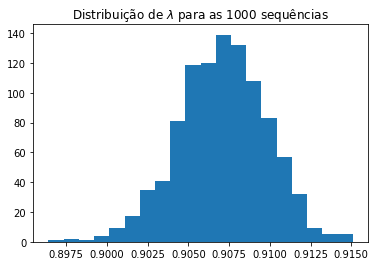

In [13]:
fig2, ax2 = plt.subplots()
ax2.hist(metrics, bins=20)#, density=True)#, cumulative=True)
plt.title('Distribuição de $\lambda$ para as 1000 sequências')

In [14]:
stats.describe(full_sorted_metrics)

DescribeResult(nobs=1003, minmax=(0.8964016674064257, 0.9150939809123056), mean=0.9071073907802256, variance=7.355189515190429e-06, skewness=-0.14698150534830137, kurtosis=0.24221840415652185)

In [15]:
prob_hengelson = hengelson_index / len(full_sorted_metrics)
print('P(Sequenciamento) = {:.2%}'.format(prob_hengelson))
prob_tgs = tgs_index / len(full_sorted_metrics)
print('P(TGC) = {:.2%}'.format(prob_tgs))
prob_own = own_index / len(full_sorted_metrics)
print('P(Própria) = {:.2%}'.format(prob_own))

P(Sequenciamento) = 40.38%
P(TGC) = 86.94%
P(Própria) = 48.85%


### Definir nova métrica
Para a estação gargalo, calcula-se o valor médio absoluto de variação em torno da média (dada pelo tempo de ciclo). Quanto menor este valor, melhor será o sequenciamento definido. 

In [16]:
# Cria o DataFrame com as linhas representando as estações e a colunas os produtos
arrays = [range(len(tarefasOrder)), ['Produto', 'Tempo', 'Desvio']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
newmetric_df = pd.DataFrame(index=range(20), columns=index)

newmetric_df.loc[:,pd.IndexSlice[:, 'Produto']]=np.array(tarefasOrder).transpose()
newmetric_df.head()

e4 = dados[3]

for i in range(1000):
    newmetric_df.loc[:, pd.IndexSlice[i, 'Tempo']]=np.array(e4.loc[newmetric_df[i]['Produto']])

for i in range(1000):
    newmetric_df.loc[:, pd.IndexSlice[i,'Desvio']] = newmetric_df.loc[:, pd.IndexSlice[i,'Tempo']] - pd.Series([722]*20)

In [17]:
desvios_df = newmetric_df.loc[:, pd.IndexSlice[:,['Desvio', 'Acumulado']]]
desvios_df.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,-19.9,61.7,-77.4,61.7,-39.6,-39.6,-19.9,61.7,34.3,-39.6,...,61.7,47.0,34.3,34.3,8.2,47.0,61.7,61.7,-39.6,8.2
1,61.7,-19.9,8.2,-39.6,-77.4,-39.6,47.0,-19.9,-77.4,34.3,...,8.2,-19.9,-77.4,8.2,34.3,34.3,8.2,34.3,8.2,34.3
2,47.0,47.0,8.2,47.0,-77.4,61.7,-19.9,-77.4,8.2,-77.4,...,61.7,34.3,61.7,-39.6,34.3,-77.4,-77.4,8.2,-77.4,61.7
3,-39.6,-77.4,8.2,-39.6,8.2,8.2,-19.9,-19.9,-77.4,61.7,...,34.3,61.7,-39.6,-19.9,8.2,-77.4,8.2,-39.6,-77.4,8.2
4,-77.4,8.2,61.7,-39.6,47.0,-19.9,61.7,47.0,-39.6,8.2,...,47.0,34.3,-39.6,-77.4,47.0,61.7,61.7,61.7,-19.9,8.2


In [18]:
acumulado = desvios_df.cumsum()
acumulado.head()

Pos,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
state,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,...,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio,Desvio
0,-19.9,61.7,-77.4,61.7,-39.6,-39.6,-19.9,61.7,34.3,-39.6,...,61.7,47.0,34.3,34.3,8.2,47.0,61.7,61.7,-39.6,8.2
1,41.8,41.8,-69.2,22.1,-117.0,-79.2,27.1,41.8,-43.1,-5.3,...,69.9,27.1,-43.1,42.5,42.5,81.3,69.9,96.0,-31.4,42.5
2,88.8,88.8,-61.0,69.1,-194.4,-17.5,7.2,-35.6,-34.9,-82.7,...,131.6,61.4,18.6,2.9,76.8,3.9,-7.5,104.2,-108.8,104.2
3,49.2,11.4,-52.8,29.5,-186.2,-9.3,-12.7,-55.5,-112.3,-21.0,...,165.9,123.1,-21.0,-17.0,85.0,-73.5,0.7,64.6,-186.2,112.4
4,-28.2,19.6,8.9,-10.1,-139.2,-29.2,49.0,-8.5,-151.9,-12.8,...,212.9,157.4,-60.6,-94.4,132.0,-11.8,62.4,126.3,-206.1,120.6


In [19]:
# Cálculos feitos no excel
abs_mean_hengelson = 9.11 
abs_mean_tgs = 17.75
abs_mean_own = 59.10

random_seq = np.array(acumulado.mean(axis=0).abs())
full_random_seq = np.append(random_seq, (abs_mean_hengelson, abs_mean_own, abs_mean_tgs))
full_random_seq_sorted = np.sort(full_random_seq)

hengelson_abs_index = full_random_seq_sorted.tolist().index(abs_mean_hengelson)  
tgs_abs_index = full_random_seq_sorted.tolist().index(abs_mean_tgs) 
own_abs_index = full_random_seq_sorted.tolist().index(abs_mean_own) 

Text(0.5, 1.0, 'Média absoluta dos desvios em relação à média')

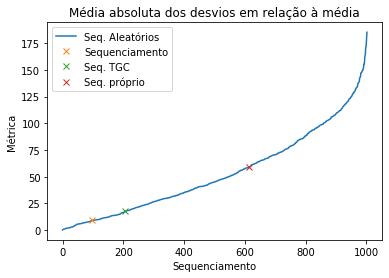

In [20]:
fig3, ax3 = plt.subplots()
ax3.plot(range(len(full_random_seq_sorted)), full_random_seq_sorted, label = 'Seq. Aleatórios')
ax3.plot(hengelson_abs_index, abs_mean_hengelson, 'x', label = 'Sequenciamento')
ax3.plot(tgs_abs_index, abs_mean_tgs, 'x', label = 'Seq. TGC')
ax3.plot(own_abs_index, abs_mean_own, 'x', label = 'Seq. próprio')
plt.legend()
plt.xlabel('Sequenciamento')
plt.ylabel('Métrica')
plt.title('Média absoluta dos desvios em relação à média')

Text(0.5, 1.0, 'Histograma')

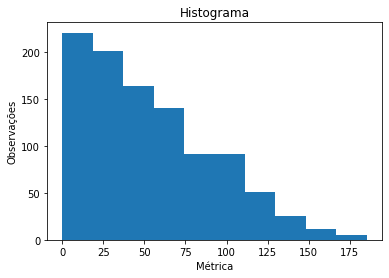

In [21]:
fig4, ax4 = plt.subplots()
ax4.hist(full_random_seq)
plt.xlabel('Métrica')
plt.ylabel('Observações')
plt.title('Histograma')

In [22]:
prob_hengelson2 = (len(full_random_seq_sorted)-hengelson_abs_index) / len(full_random_seq_sorted)
print('P(Sequenciamento) = {:.2%}'.format(prob_hengelson2))
prob_tgs2 = (len(full_random_seq_sorted)-tgs_abs_index) / len(full_random_seq_sorted)
print('P(TGC) = {:.2%}'.format(prob_tgs2))
prob_own2 = (len(full_random_seq_sorted)-own_abs_index) / len(full_random_seq_sorted)
print('P(Própria) = {:.2%}'.format(prob_own2))

P(Sequenciamento) = 90.23%
P(TGC) = 79.36%
P(Própria) = 38.68%
